<a href="https://colab.research.google.com/github/Jamshidbek077/AviaCHipta_narxlari_prediction_models/blob/master/Aviachipta_narxlari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import cm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder,LabelEncoder,StandardScaler
LE=LabelEncoder()

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [32]:
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegressionCV
from sklearn.linear_model import LassoCV ,RidgeCV , ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

In [33]:
df_train=pd.read_csv('/content/train_data.csv')
df_train.head(20)

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
5,6,Air_India,AI-636,Delhi,Afternoon,one,Morning,Chennai,Business,20.42,5,45257
6,7,Vistara,UK-834,Chennai,Evening,one,Morning,Mumbai,Economy,18.42,20,5054
7,8,Air_India,AI-505,Bangalore,Morning,zero,Afternoon,Delhi,Business,2.58,30,32923
8,9,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Hyderabad,Economy,15.92,12,11383
9,10,Air_India,AI-538,Chennai,Night,one,Afternoon,Mumbai,Economy,16.50,18,4357


In [34]:
df_train=df_train.dropna()

In [35]:
df_test=pd.read_csv('/content/test_data.csv')
df_test.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [36]:
df_train['departure_time'].unique()

array(['Early_Morning', 'Evening', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [37]:
# df_train.columns[2].info()

In [38]:
df_train['class']=LE.fit_transform(df_train['class'])
df_train

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,1,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,1,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,0,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,1,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,1,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,Indigo,6E-6178,Bangalore,Night,one,Early_Morning,Mumbai,1,7.92,45,3153
19996,19997,AirAsia,I5-582,Kolkata,Morning,one,Afternoon,Delhi,1,5.83,24,3911
19997,19998,Vistara,UK-832,Chennai,Early_Morning,two_or_more,Evening,Bangalore,1,35.33,17,14822
19998,19999,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,1,16.33,21,6450


In [39]:
def processing(df):
  # df.drop('flight',axis=1,inplace=True)
  df['departure_time']=LE.fit_transform(df['departure_time'])
  df['stops']=LE.fit_transform(df['stops'])
  # df['arrival_time']=LE.fit_transfrom(df['arrival_time'])
  df['class']=LE.fit_transform(df['class'])
  return df
df_train=processing(df_train)
df_test=processing(df_test)
X=df_train.drop('price',axis=1)
y=df_train['price']

In [40]:
df_train

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,1,0,Night,Mumbai,1,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,2,2,Night,Kolkata,1,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,4,0,Evening,Delhi,0,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,4,0,Evening,Hyderabad,1,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,1,2,Morning,Mumbai,1,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,Indigo,6E-6178,Bangalore,5,0,Early_Morning,Mumbai,1,7.92,45,3153
19996,19997,AirAsia,I5-582,Kolkata,4,0,Afternoon,Delhi,1,5.83,24,3911
19997,19998,Vistara,UK-832,Chennai,1,1,Evening,Bangalore,1,35.33,17,14822
19998,19999,Vistara,UK-996,Mumbai,2,0,Morning,Bangalore,1,16.33,21,6450


In [41]:
df_train.dropna()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,1,0,Night,Mumbai,1,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,2,2,Night,Kolkata,1,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,4,0,Evening,Delhi,0,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,4,0,Evening,Hyderabad,1,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,1,2,Morning,Mumbai,1,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,Indigo,6E-6178,Bangalore,5,0,Early_Morning,Mumbai,1,7.92,45,3153
19996,19997,AirAsia,I5-582,Kolkata,4,0,Afternoon,Delhi,1,5.83,24,3911
19997,19998,Vistara,UK-832,Chennai,1,1,Evening,Bangalore,1,35.33,17,14822
19998,19999,Vistara,UK-996,Mumbai,2,0,Morning,Bangalore,1,16.33,21,6450


In [42]:
# def infofull_train(df_train):
#   for col_name in df_train.columns:
#     print(col_name, df_train[col_name].unique().sum(), df_train[df_train[col_name].isna()].shape[0])
# infofull_train(df_train)


In [43]:
print(f"{df_test.info()},{df_train.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5000 non-null   int64  
 1   airline           5000 non-null   object 
 2   flight            5000 non-null   object 
 3   source_city       5000 non-null   object 
 4   departure_time    5000 non-null   int64  
 5   stops             5000 non-null   int64  
 6   arrival_time      5000 non-null   object 
 7   destination_city  5000 non-null   object 
 8   class             5000 non-null   int64  
 9   duration          5000 non-null   float64
 10  days_left         5000 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 429.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id        

In [44]:
print(f"{df_test.describe()},{df_train.describe()}")

                id  departure_time        stops        class     duration  \
count  5000.000000     5000.000000  5000.000000  5000.000000  5000.000000   
mean   2500.500000        2.374600     0.272800     0.694600    12.328838   
std    1443.520003        1.744272     0.657318     0.460623     7.306348   
min       1.000000        0.000000     0.000000     0.000000     0.830000   
25%    1250.750000        1.000000     0.000000     0.000000     6.830000   
50%    2500.500000        2.000000     0.000000     1.000000    11.250000   
75%    3750.250000        4.000000     0.000000     1.000000    16.250000   
max    5000.000000        5.000000     2.000000     1.000000    40.670000   

         days_left  
count  5000.000000  
mean     26.015600  
std      13.692409  
min       1.000000  
25%      14.000000  
50%      26.000000  
75%      38.000000  
max      49.000000  ,                 id  departure_time         stops         class      duration  \
count  20000.000000    20000.000000 

In [45]:
print(f"{df_test.isnull().sum()},{df_train.isnull().sum()}")

id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64,id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [46]:
df_train

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,1,0,Night,Mumbai,1,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,2,2,Night,Kolkata,1,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,4,0,Evening,Delhi,0,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,4,0,Evening,Hyderabad,1,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,1,2,Morning,Mumbai,1,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,Indigo,6E-6178,Bangalore,5,0,Early_Morning,Mumbai,1,7.92,45,3153
19996,19997,AirAsia,I5-582,Kolkata,4,0,Afternoon,Delhi,1,5.83,24,3911
19997,19998,Vistara,UK-832,Chennai,1,1,Evening,Bangalore,1,35.33,17,14822
19998,19999,Vistara,UK-996,Mumbai,2,0,Morning,Bangalore,1,16.33,21,6450


In [47]:
df_train=df_train.dropna()

In [48]:
df_train

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,1,0,Night,Mumbai,1,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,2,2,Night,Kolkata,1,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,4,0,Evening,Delhi,0,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,4,0,Evening,Hyderabad,1,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,1,2,Morning,Mumbai,1,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,Indigo,6E-6178,Bangalore,5,0,Early_Morning,Mumbai,1,7.92,45,3153
19996,19997,AirAsia,I5-582,Kolkata,4,0,Afternoon,Delhi,1,5.83,24,3911
19997,19998,Vistara,UK-832,Chennai,1,1,Evening,Bangalore,1,35.33,17,14822
19998,19999,Vistara,UK-996,Mumbai,2,0,Morning,Bangalore,1,16.33,21,6450


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
df_train.corr()

<ipython-input-50-81897f4db25c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,id,departure_time,stops,class,duration,days_left,price
id,1.000000,-0.009564,0.001098,-0.000039,-0.000458,0.003195,-0.002443
departure_time,-0.009564,1.000000,-0.019553,-0.057410,0.091432,0.006627,0.058520
stops,0.001098,-0.019553,1.000000,0.096970,-0.480818,-0.023782,-0.201309
class,-0.000039,-0.057410,0.096970,1.000000,-0.144831,0.022332,-0.937868
duration,-0.000458,0.091432,-0.480818,-0.144831,1.000000,-0.020091,0.213158
days_left,0.003195,0.006627,-0.023782,0.022332,-0.020091,1.000000,-0.102545
price,-0.002443,0.058520,-0.201309,-0.937868,0.213158,-0.102545,1.000000


In [51]:
num_attribs = ['class','stops','duration','days_left']
cat_attribs = ['airline','source_city','departure_time','arrival_time','destination_city']

In [52]:
num_pipeline = Pipeline([
          ('std_scaler', StandardScaler())             
])
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [53]:
X_train=full_pipeline.fit_transform(X_train)
X_test=full_pipeline.fit_transform(X_test)

df_test=full_pipeline.fit_transform(df_test)

# Data vizualization

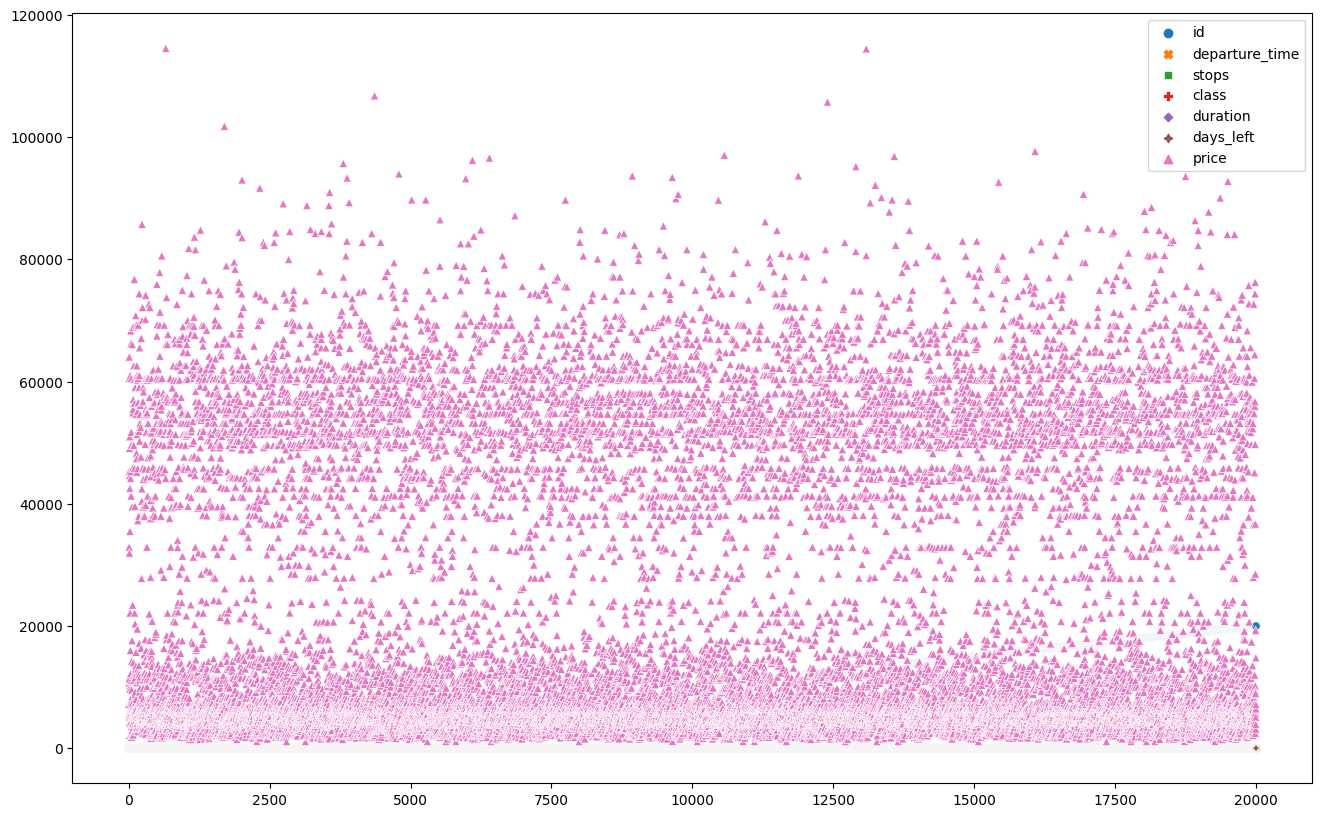

In [54]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_train)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has be

<Figure size 1600x1000 with 0 Axes>

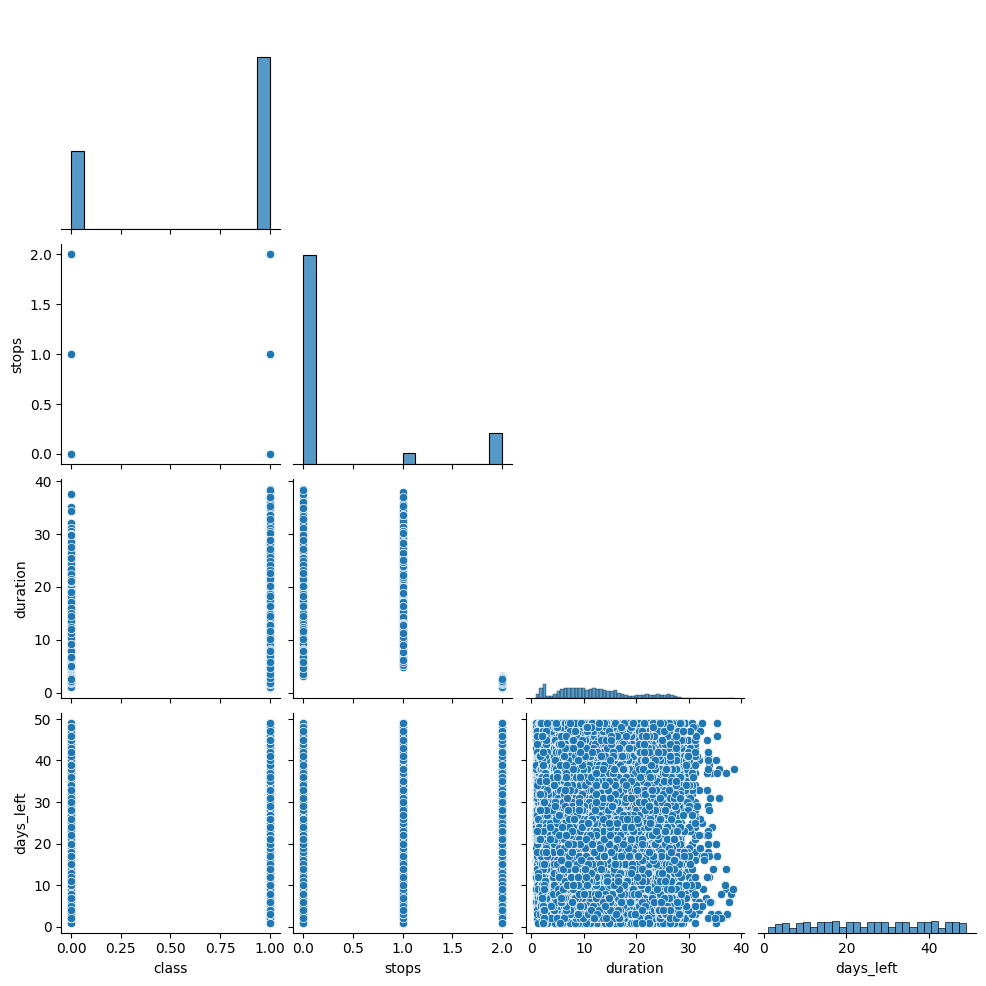

In [55]:
plt.figure(figsize=(16,10))
sns.pairplot(df_train[['class','stops','duration','days_left']],corner=True,palette='pastel')
plt.show()

# Model Building

In [56]:
def model(y_test,y_train,X_test,X_train,model):
    
    model1 = model()
    model1.fit(X_train,y_train)
    y_pred = model1.predict(X_test)
    r2_score(y_test,y_pred)
    print('-----------------')
    print(model)
    print('-----------------')
    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
    print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')

In [28]:
x1 = [model(y_test,y_train,X_test,X_train,i) for i in [LinearRegression,Lasso,Ridge,ElasticNet,RandomForestRegressor,DecisionTreeRegressor,KNeighborsRegressor,GradientBoostingRegressor,LogisticRegression]]
x1

-----------------
<class 'sklearn.linear_model._base.LinearRegression'>
-----------------
MSE: 46614373.78902833
MAE: 4596.839114181073
R2 : 91.12 %
-----------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
-----------------
MSE: 46610691.73877483
MAE: 4595.15064147456
R2 : 91.12 %
-----------------
<class 'sklearn.linear_model._ridge.Ridge'>
-----------------
MSE: 46613792.64501595
MAE: 4596.577333430059
R2 : 91.12 %
-----------------
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
-----------------
MSE: 97436213.75570087
MAE: 7413.75929221752
R2 : 81.44 %
-----------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
-----------------
MSE: 14930366.684733627
MAE: 2006.8011132738097
R2 : 97.16 %
-----------------
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
-----------------
MSE: 24595547.183875
MAE: 2273.02325
R2 : 95.32 %
-----------------
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
-----------------
MSE: 20952855.7

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-----------------
<class 'sklearn.linear_model._logistic.LogisticRegression'>
-----------------
MSE: 30236322.6775
MAE: 2525.392
R2 : 94.24 %


[None, None, None, None, None, None, None, None, None]

In [61]:
X = full_pipeline.fit_transform(X)
model = RandomForestRegressor()
model.fit(X, y)
y_predicted = model.predict(df_test)
y_predicted


array([52951.75, 53468.87, 22807.72, ..., 50295.26, 48127.15, 65997.7 ])

In [29]:
sample=pd.read_csv('/content/sample_solution.csv')
sample.head()

,id,price
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [64]:
y_predicted

array([52951.75, 53468.87, 22807.72, ..., 50295.26, 48127.15, 65997.7 ])

In [63]:
sample['price']=y_predicted
sample

,id,price
0,1,52951.75
1,2,53468.87
2,3,22807.72
3,4,3080.04
4,5,5744.48
...,...,...
4995,4996,59781.57
4996,4997,4499.45
4997,4998,50295.26
4998,4999,48127.15
